# IMPORTAR LIBRERÍAS

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# Split X train y test
from sklearn.model_selection import train_test_split

# Modelos para validación cruzada con cross_val_score y cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelos para validar por regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Validación de modelos:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Calificación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer


# Para imputación categórica a numérica y predicción de columna numérica Destruction Level en Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

# Convertir columnas categóricas (Disaster Subtype, Origin, Associated Disaster) a numéricas para predecir Destruction Level Dis o Mag Value
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Pipeline
from sklearn.pipeline import Pipeline
import joblib # guardar pipeline

In [65]:
df = pd.read_csv('../../99 PRUEBAS a los CSV/01 Prueba quitando eventos/04DesNat_DEFS_limpio_fc.csv')
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [66]:
df['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Central America',
       'South America', 'Western Europe', 'Eastern Asia', 'Caribbean',
       'Northern Africa', 'Northern America', 'South-Eastern Asia',
       'Eastern Europe', 'Southern Europe', 'Melanesia', 'Polynesia',
       'Eastern Africa', 'Northern Europe', 'Western Asia',
       'Australia and New Zealand', 'Micronesia', 'Southern Africa',
       'Middle Africa', 'Russian Federation', 'Central Asia'],
      dtype=object)

Hay 23 regiones. Demasiadas para codificar. Pensar en codificar por continente

## Codificación categórico a numérico


In [67]:
df['Disaster Type'].value_counts()

Flood         5808
Storm         4618
Earthquake    1597
Drought        803
Name: Disaster Type, dtype: int64

In [68]:
# El mapeo o la función se hace para la salida, así que no vale para nada
# Función personalizada para tratar la columna Disaster Type
def classify_disaster(Disaster_Type):
    if 'Drought' in Disaster_Type:
        return 1
    elif 'Earthquake' in Disaster_Type:
        return 2
    elif 'Storm' in Disaster_Type:
        return 3
    else:
        return 4
    
df['Disaster_int'] = df['Disaster Type'].apply(classify_disaster)
df['Disaster_int'].value_counts()

4    5808
3    4618
2    1597
1     803
Name: Disaster_int, dtype: int64

In [69]:
df.head()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj,Disaster_int
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,1900,0,0,1900,0,0,11000,0,0,1
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,1900,0,0,1900,0,0,1250000,0,0,1
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,1902,4,18,1902,4,18,2000,0,843726,2
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,1904,11,0,1904,11,0,0,0,0,3
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,1905,4,4,1905,4,4,20000,0,812477,2


<Axes: xlabel='Region', ylabel='Total Affected'>

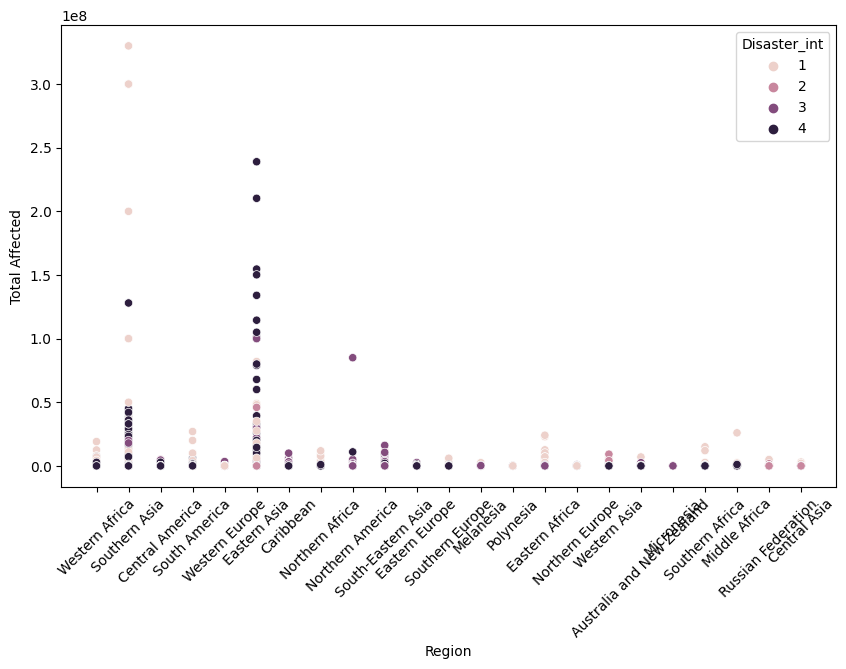

In [70]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(data=df, x='Region', y='Total Affected', hue='Disaster_int')

<Axes: xlabel='Year', ylabel='Total Affected'>

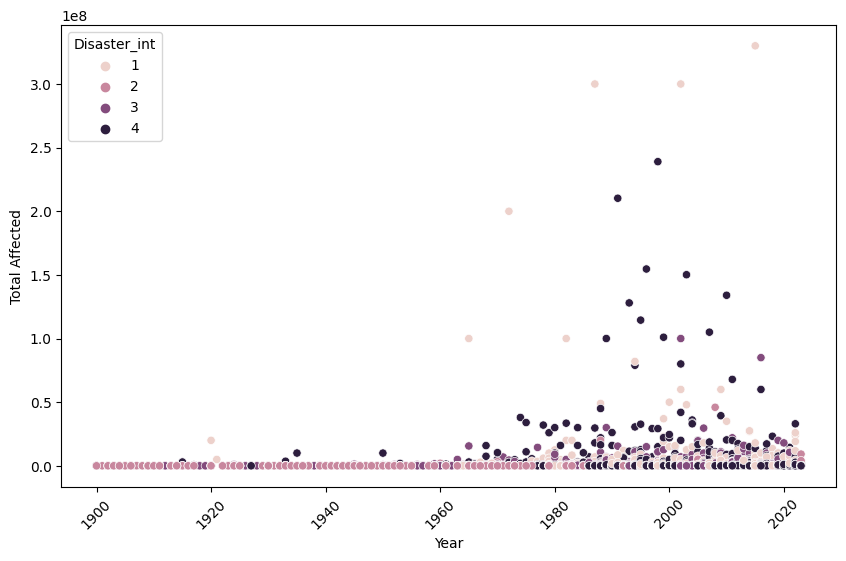

In [71]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(data=df, x='Year', y='Total Affected', hue='Disaster_int')

In [72]:
# Función personalizada para tratar la columna Region
def classify_disaster(Region):
    if 'Western Africa' in Region:
        return 1
    elif 'Southern Asia' in Region:
        return 2
    elif 'Central America' in Region:
        return 3
    elif 'South America' in Region:
        return 4
    elif 'Western Europe' in Region:
        return 5
    elif 'Eastern Asia' in Region:
        return 6
    elif 'Caribbean' in Region:
        return 7
    elif 'Northern Africa' in Region:
        return 8
    elif 'Northern America' in Region:
        return 9
    elif 'South-Eastern Asia' in Region:
        return 10
    elif 'Eastern Europe' in Region:
        return 11
    elif 'Southern Europe' in Region:
        return 12
    elif 'Melanesia' in Region:
        return 13
    elif 'Polynesia' in Region:
        return 14
    elif 'Eastern Africa' in Region:
        return 15
    elif 'Northern Europe' in Region:
        return 16
    elif 'Western Asia' in Region:
        return 17
    elif 'Micronesia' in Region:
        return 18
    elif 'Australia and New Zealand' in Region:
        return 19
    elif 'Southern Africa' in Region:
        return 20
    elif 'Middle Africa' in Region:
        return 21
    elif 'Russian Federation' in Region:
        return 22
    else:
        return 23
    
df['Region_int'] = df['Region'].apply(classify_disaster)
df['Region_int'].value_counts()

6     3284
2     1653
9     1093
4      988
15     837
3      683
7      584
12     482
1      462
17     427
5      418
11     382
8      257
19     239
21     222
13     203
20     182
16     167
23      91
14      82
22      50
18      40
Name: Region_int, dtype: int64

In [73]:
df_red = df[['Disaster Type', 'Region']]
df_red.head()

,Disaster Type,Region
0,Drought,Western Africa
1,Drought,Southern Asia
2,Earthquake,Central America
3,Storm,Southern Asia
4,Earthquake,Southern Asia


In [74]:
df_year= df[['Year']]

In [75]:
df_red.shape

(12826, 2)

In [76]:
df_numerical= pd.get_dummies(df_red)
df_numerical.head()

,Disaster Type_Drought,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm,Region_Australia and New Zealand,Region_Caribbean,Region_Central America,Region_Central Asia,Region_Eastern Africa,Region_Eastern Asia,...,Region_Polynesia,Region_Russian Federation,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
df_modelo = pd.concat([df_numerical, df_year], axis=1)
df_modelo.head(2)

,Disaster Type_Drought,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm,Region_Australia and New Zealand,Region_Caribbean,Region_Central America,Region_Central Asia,Region_Eastern Africa,Region_Eastern Asia,...,Region_Russian Federation,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe,Year
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1900
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1900


In [78]:
df_modelo.isnull().sum()

Disaster Type_Drought               0
Disaster Type_Earthquake            0
Disaster Type_Flood                 0
Disaster Type_Storm                 0
Region_Australia and New Zealand    0
Region_Caribbean                    0
Region_Central America              0
Region_Central Asia                 0
Region_Eastern Africa               0
Region_Eastern Asia                 0
Region_Eastern Europe               0
Region_Melanesia                    0
Region_Micronesia                   0
Region_Middle Africa                0
Region_Northern Africa              0
Region_Northern America             0
Region_Northern Europe              0
Region_Polynesia                    0
Region_Russian Federation           0
Region_South America                0
Region_South-Eastern Asia           0
Region_Southern Africa              0
Region_Southern Asia                0
Region_Southern Europe              0
Region_Western Africa               0
Region_Western Asia                 0
Region_Weste

<Axes: >

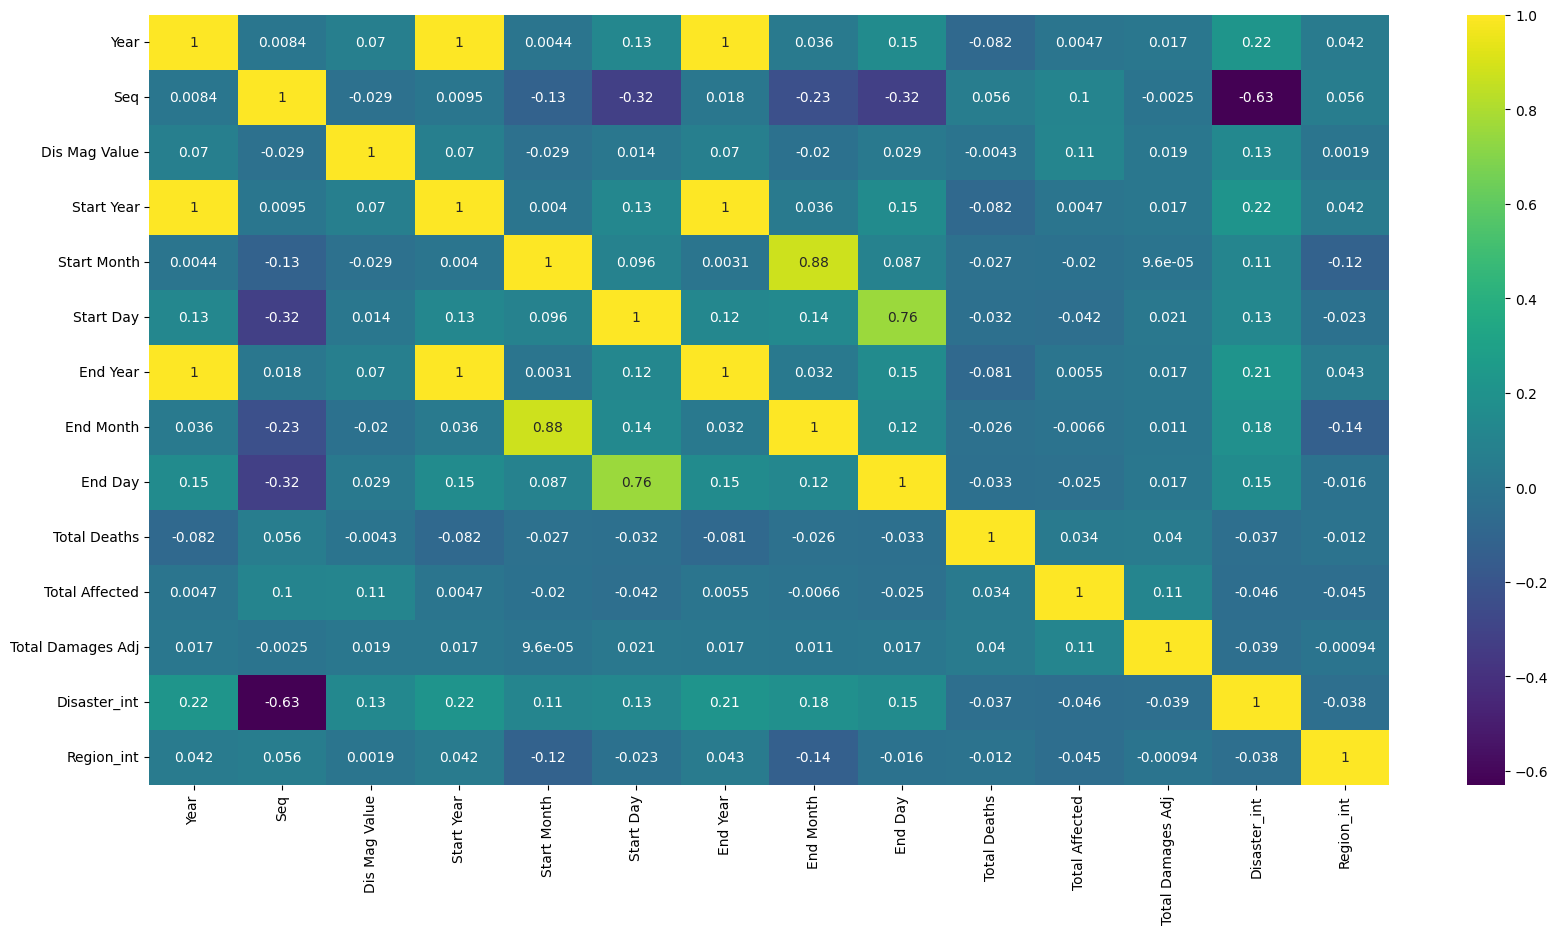

In [79]:
plt.figure(figsize=(20,10))
df_corr = df.corr(numeric_only = True)
sns.heatmap(df_corr, annot=True, cmap='viridis')

In [80]:
df_results = pd.DataFrame(columns= ['Nombre_modelo', 'mae_train', 'rmse_train','mae_test','rmse_test'])

# REGRESION LINEAL MÚLTIPLE CON START YEAR, REGION, DISASTER TYPE


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape} {y_train.shape}")
print(f"Test: {X_test.shape} {y_test.shape}")

Entrenamiento: (10260, 28) (10260,)
Test: (2566, 28) (2566,)


In [82]:
X = df_modelo
y= df['Total Affected']


model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'Regresion Lineal Múltiple',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.283594e+06,7.394084e+06,1.303861e+06,6.561446e+06


In [83]:
def plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test):
    resid_train = y_train - y_predictions_train
    resid_test = y_test - y_predictions_test

    sns.residplot(x=y_predictions_train, y=resid_train, color='b', lowess=True)
    plt.title('Residuos en entrenamiento')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

    sns.residplot(x=y_predictions_test, y=resid_test, color='r', lowess=True)
    plt.title('Residuos en test')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

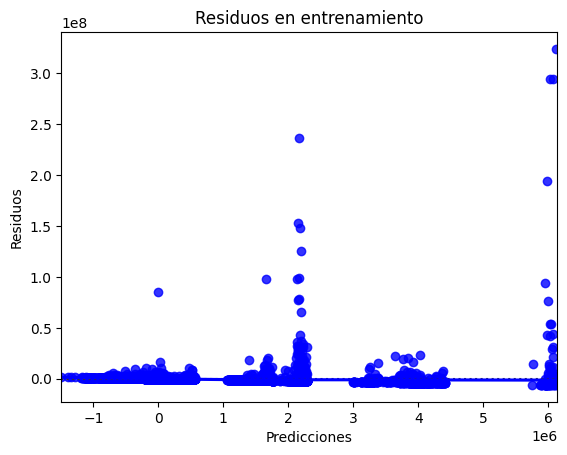

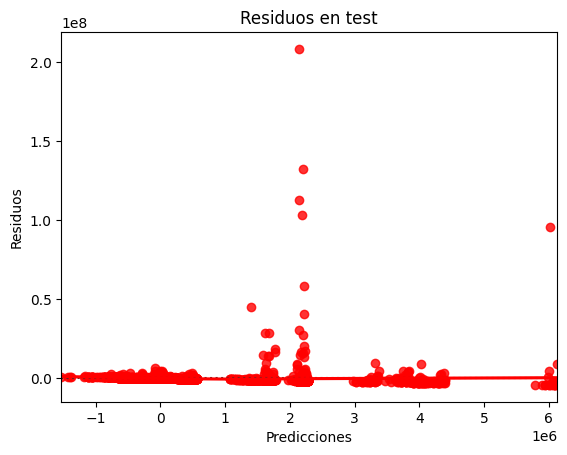

In [84]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

# REGRESION LINEAL MÚLTIPLE POLINÓMICA CON START YEAR, REGION, DISASTER TYPE


In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
X = df_modelo
y= df['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = PolynomialFeatures(degree=2)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'Regresion Lineal Múltiple Polinómica (grado 2)',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.283594e+06,7.394084e+06,1.303861e+06,6.561446e+06
1,Regresion Lineal Múltiple Polinómica (grado 2),1.062704e+06,7.112594e+06,1.108921e+06,6.657291e+06


In [87]:
def plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test):
    resid_train = y_train - y_predictions_train
    resid_test = y_test - y_predictions_test

    sns.residplot(x=y_predictions_train, y=resid_train, color='b', lowess=True)
    plt.title('Residuos en entrenamiento')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

    sns.residplot(x=y_predictions_test, y=resid_test, color='r', lowess=True)
    plt.title('Residuos en test')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

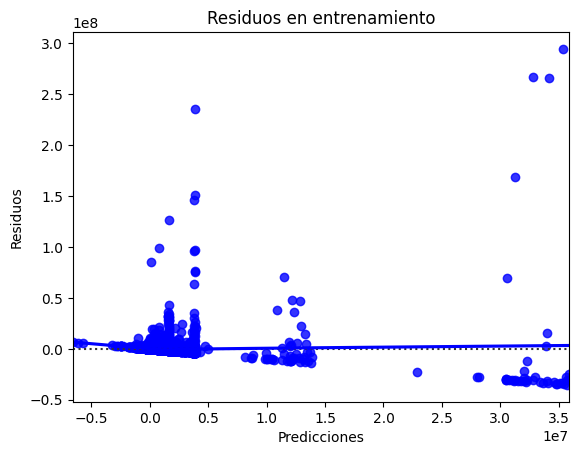

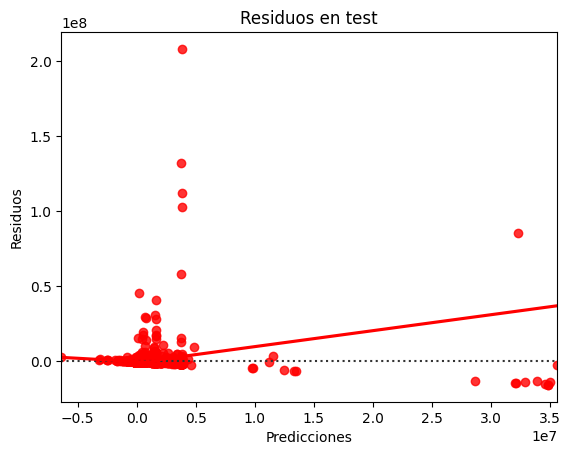

In [88]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

In [89]:
X = df_modelo
y= df['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = PolynomialFeatures(degree=3)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'Regresion Lineal Múltiple Polinómica (grado 3)',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.283594e+06,7.394084e+06,1.303861e+06,6.561446e+06
1,Regresion Lineal Múltiple Polinómica (grado 2),1.062704e+06,7.112594e+06,1.108921e+06,6.657291e+06
2,Regresion Lineal Múltiple Polinómica (grado 3),1.074116e+06,7.080590e+06,1.141071e+06,6.716418e+06


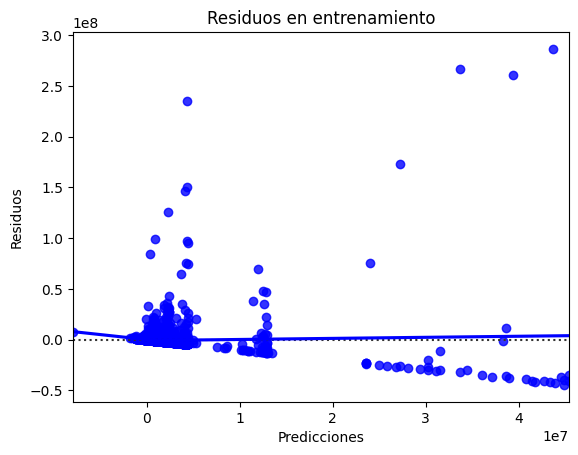

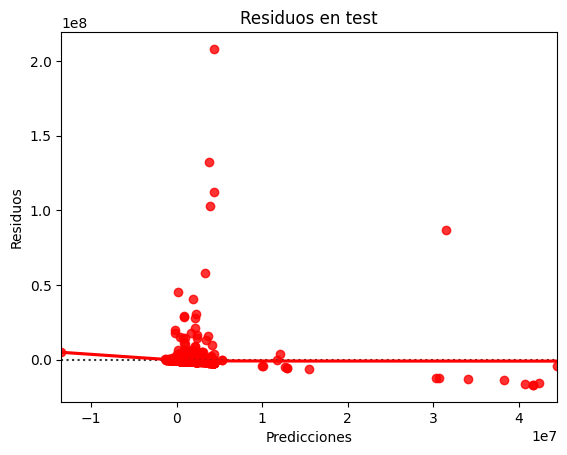

In [90]:
plot_residuos(y_train, y_predictions_train, y_test, y_predictions_test)

In [91]:
X = df_modelo
y= df['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'KNNRegressor n_neighbors 3',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.283594e+06,7.394084e+06,1.303861e+06,6.561446e+06
1,Regresion Lineal Múltiple Polinómica (grado 2),1.062704e+06,7.112594e+06,1.108921e+06,6.657291e+06
2,Regresion Lineal Múltiple Polinómica (grado 3),1.074116e+06,7.080590e+06,1.141071e+06,6.716418e+06
3,KNNRegressor n_neighbors 3,9.471122e+05,6.700132e+06,1.049574e+06,7.361469e+06


In [92]:
X = df_modelo
y= df['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'KNNRegressor n_neighbors 5',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head()

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.283594e+06,7.394084e+06,1.303861e+06,6.561446e+06
1,Regresion Lineal Múltiple Polinómica (grado 2),1.062704e+06,7.112594e+06,1.108921e+06,6.657291e+06
2,Regresion Lineal Múltiple Polinómica (grado 3),1.074116e+06,7.080590e+06,1.141071e+06,6.716418e+06
3,KNNRegressor n_neighbors 3,9.471122e+05,6.700132e+06,1.049574e+06,7.361469e+06
4,KNNRegressor n_neighbors 5,9.356848e+05,6.868725e+06,1.030694e+06,7.159833e+06


In [94]:
X = df_modelo
y= df['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train, y_train)

y_predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_predictions_train)
rmse_train = mean_squared_error(y_train, y_predictions_train, squared=False)

y_predictions_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_predictions_test)
rmse_test = mean_squared_error(y_test, y_predictions_test, squared=False)

new_row = {
    'Nombre_modelo': 'KNNRegressor n_neighbors 7',
    'mae_train' : mae_train,
    'rmse_train' : rmse_train,
    'mae_test': mae_test,
    'rmse_test': rmse_test
}

df_results.loc[df_results.shape[0]] = new_row
df_results.head(10)

,Nombre_modelo,mae_train,rmse_train,mae_test,rmse_test
0,Regresion Lineal Múltiple,1.283594e+06,7.394084e+06,1.303861e+06,6.561446e+06
1,Regresion Lineal Múltiple Polinómica (grado 2),1.062704e+06,7.112594e+06,1.108921e+06,6.657291e+06
2,Regresion Lineal Múltiple Polinómica (grado 3),1.074116e+06,7.080590e+06,1.141071e+06,6.716418e+06
3,KNNRegressor n_neighbors 3,9.471122e+05,6.700132e+06,1.049574e+06,7.361469e+06
4,KNNRegressor n_neighbors 5,9.356848e+05,6.868725e+06,1.030694e+06,7.159833e+06
5,KNNRegressor n_neighbors 7,9.467369e+05,6.920008e+06,1.007583e+06,6.887521e+06
6,KNNRegressor n_neighbors 7,9.467369e+05,6.920008e+06,1.007583e+06,6.887521e+06
